In [100]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
#Dataset importing
data_df=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls')
#Display data and types of columns
print(data_df.head())
print(data_df.describe())
print(data_df.columns)


  MouseID  DYRK1A_N   ITSN1_N    BDNF_N  ...  Genotype  Treatment  Behavior   class
0   309_1  0.503644  0.747193  0.430175  ...   Control  Memantine       C/S  c-CS-m
1   309_2  0.514617  0.689064  0.411770  ...   Control  Memantine       C/S  c-CS-m
2   309_3  0.509183  0.730247  0.418309  ...   Control  Memantine       C/S  c-CS-m
3   309_4  0.442107  0.617076  0.358626  ...   Control  Memantine       C/S  c-CS-m
4   309_5  0.434940  0.617430  0.358802  ...   Control  Memantine       C/S  c-CS-m

[5 rows x 82 columns]
          DYRK1A_N      ITSN1_N  ...    H3MeK4_N       CaNA_N
count  1077.000000  1077.000000  ...  810.000000  1080.000000
mean      0.425810     0.617102  ...    0.205440     1.337784
std       0.249362     0.251640  ...    0.055514     0.317126
min       0.145327     0.245359  ...    0.101787     0.586479
25%       0.288121     0.473361  ...    0.165143     1.081423
50%       0.366378     0.565782  ...    0.193994     1.317441
75%       0.487711     0.698032  ...   

In [102]:
#Calculating number of each values in the feature
data_df['Genotype'].value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

In [103]:
#Calculating number of each values in the feature
data_df['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-CS-m    135
c-CS-s    135
t-SC-m    135
c-SC-s    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

In [104]:
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

None

As it can be observed, there are some null values present in most of the features

In [105]:
data_df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [106]:
#Dropping duplicates if any
data_df = data_df.drop_duplicates()
#Removing the null values
data_df= data_df.dropna(thresh=75)
data_df= data_df.fillna(data_df.mean())

In [107]:
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1077 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

None

Now that there is no null value present, we can proceed with the modified data  
Changing object datatype of genotype feature into binary

In [108]:
map_genotype={'Control':0,'Ts65Dn':1}
data_df= data_df.replace({'Genotype': map_genotype})

In [109]:
#Dealing with missing variables
input_variable = data_df.drop(columns=['MouseID','Genotype','Treatment','Behavior','class'])

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
mice_filled = imp.fit_transform(input_variable)
data=pd.DataFrame(mice_filled)
data.columns=input_variable.columns


##Data Visualisation

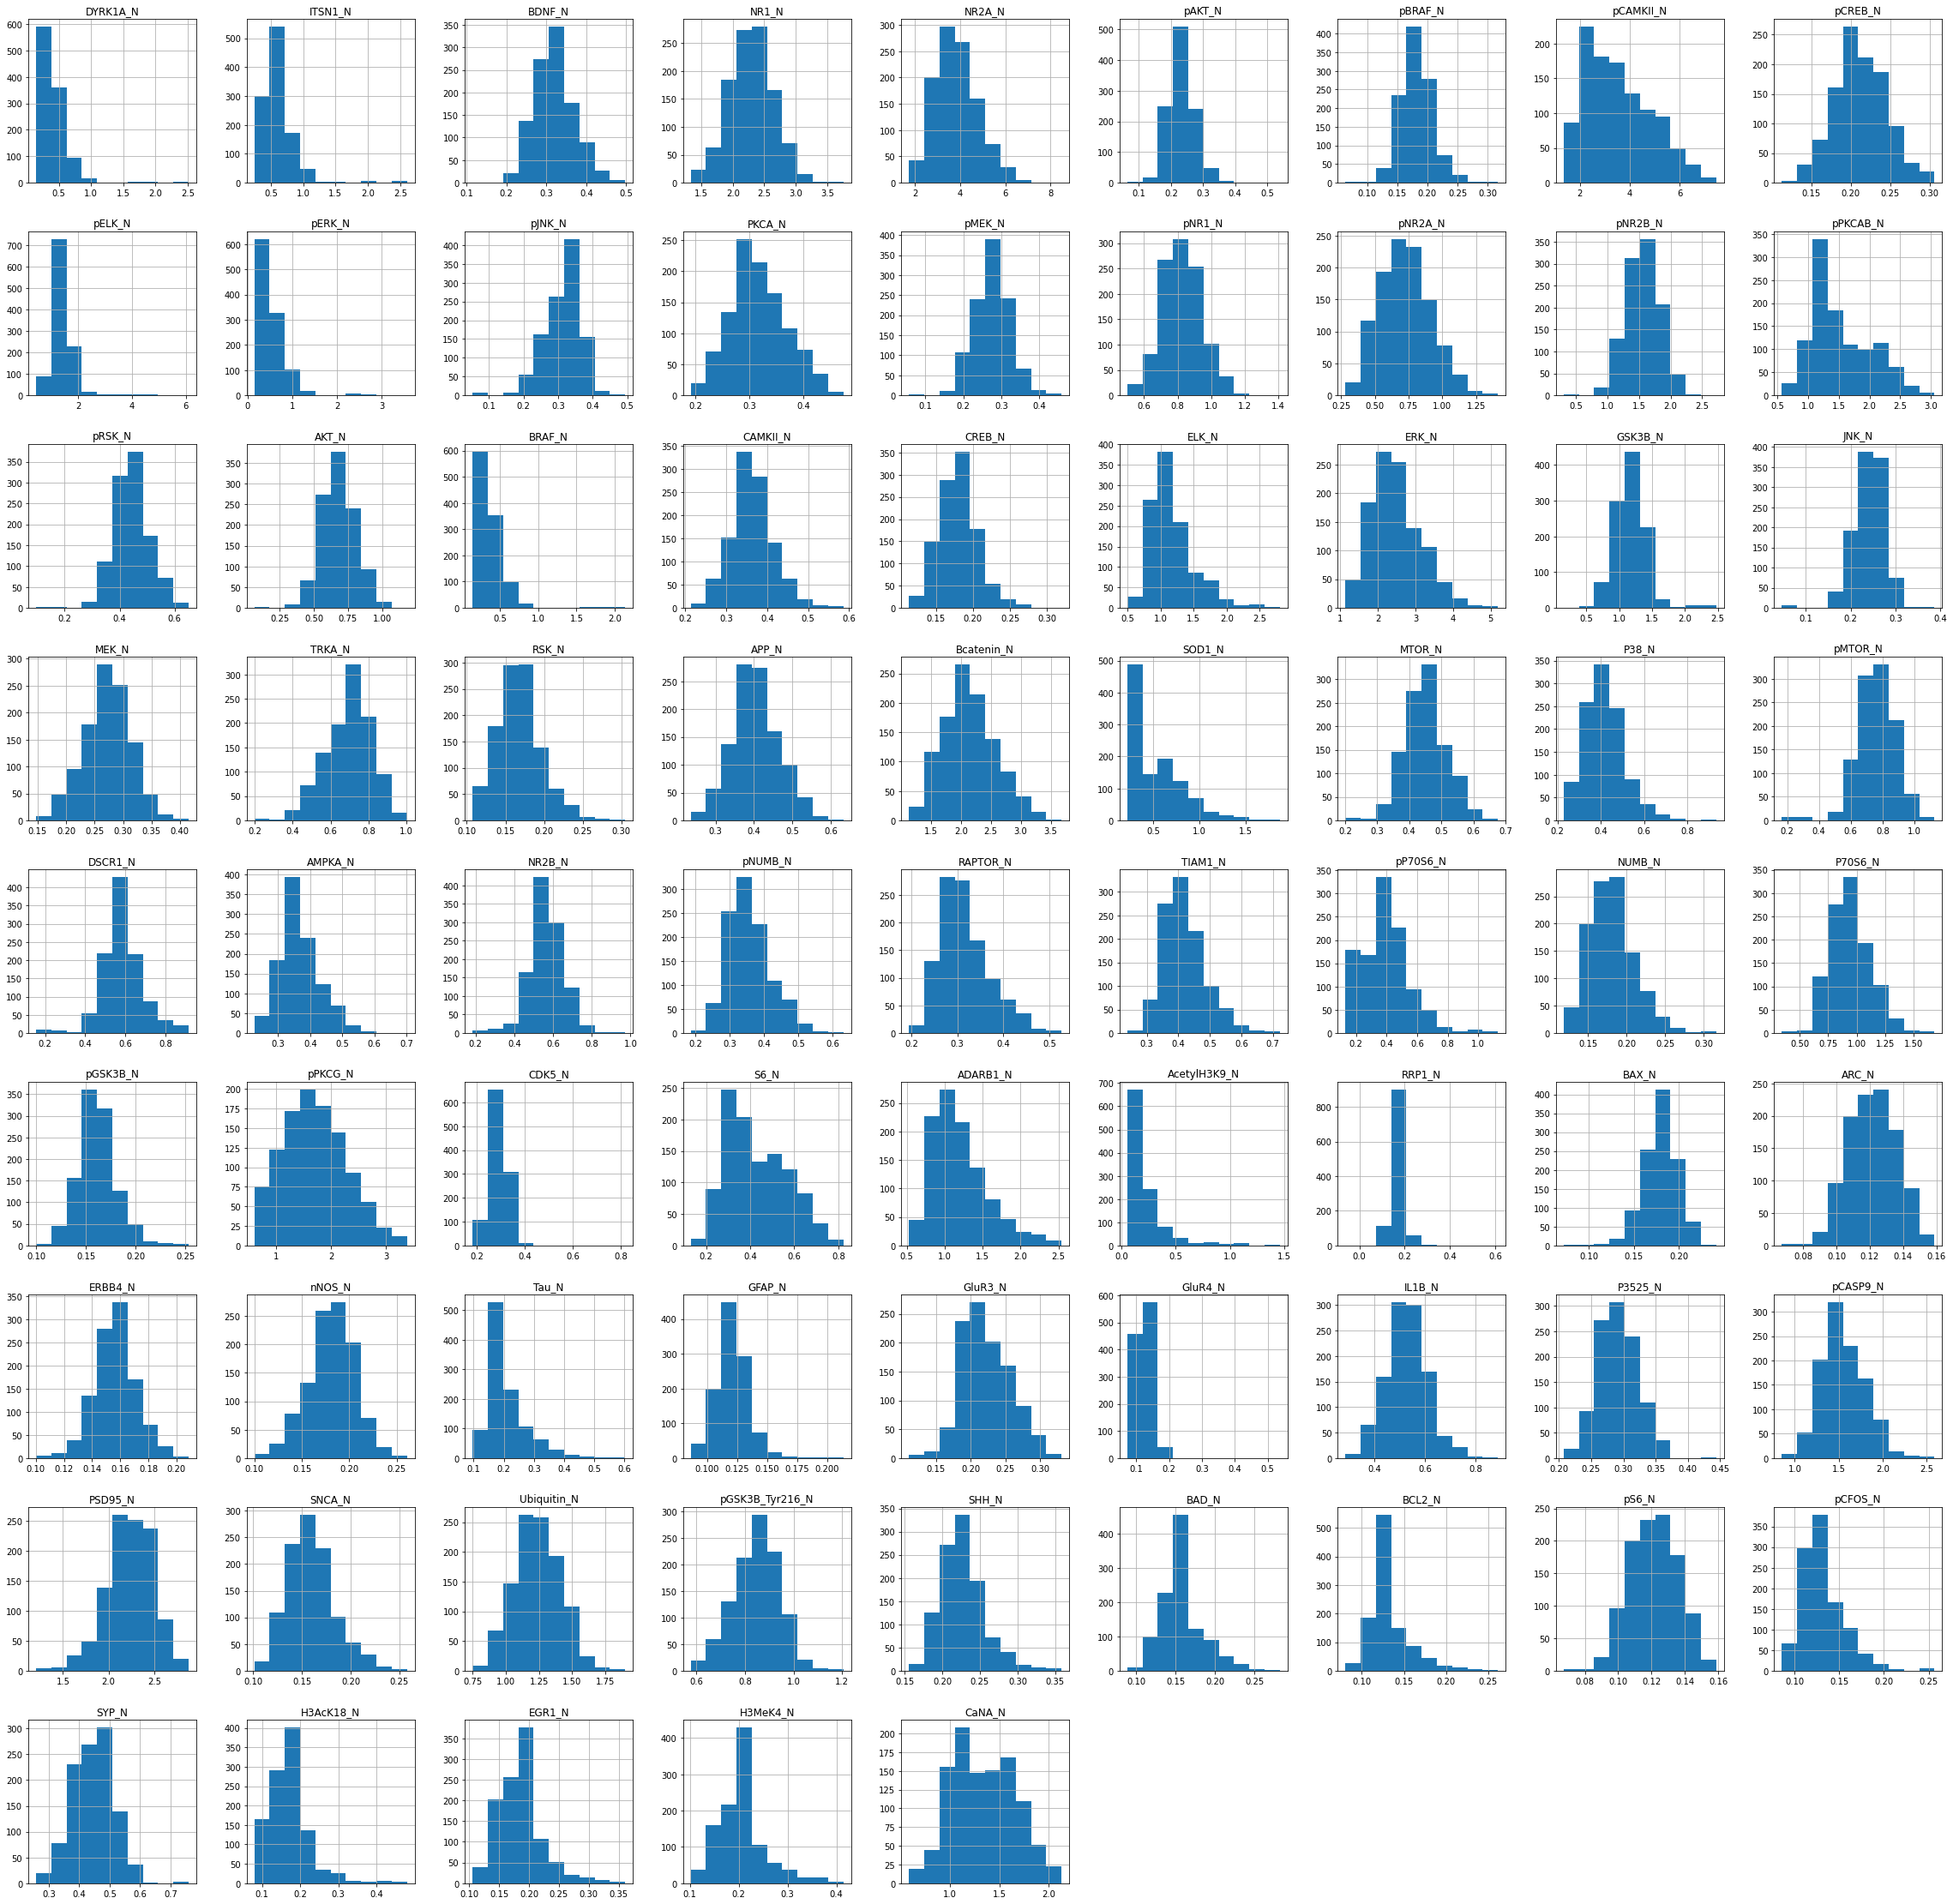

In [110]:
data.hist(bins=10, figsize=(40,40))
plt.show()

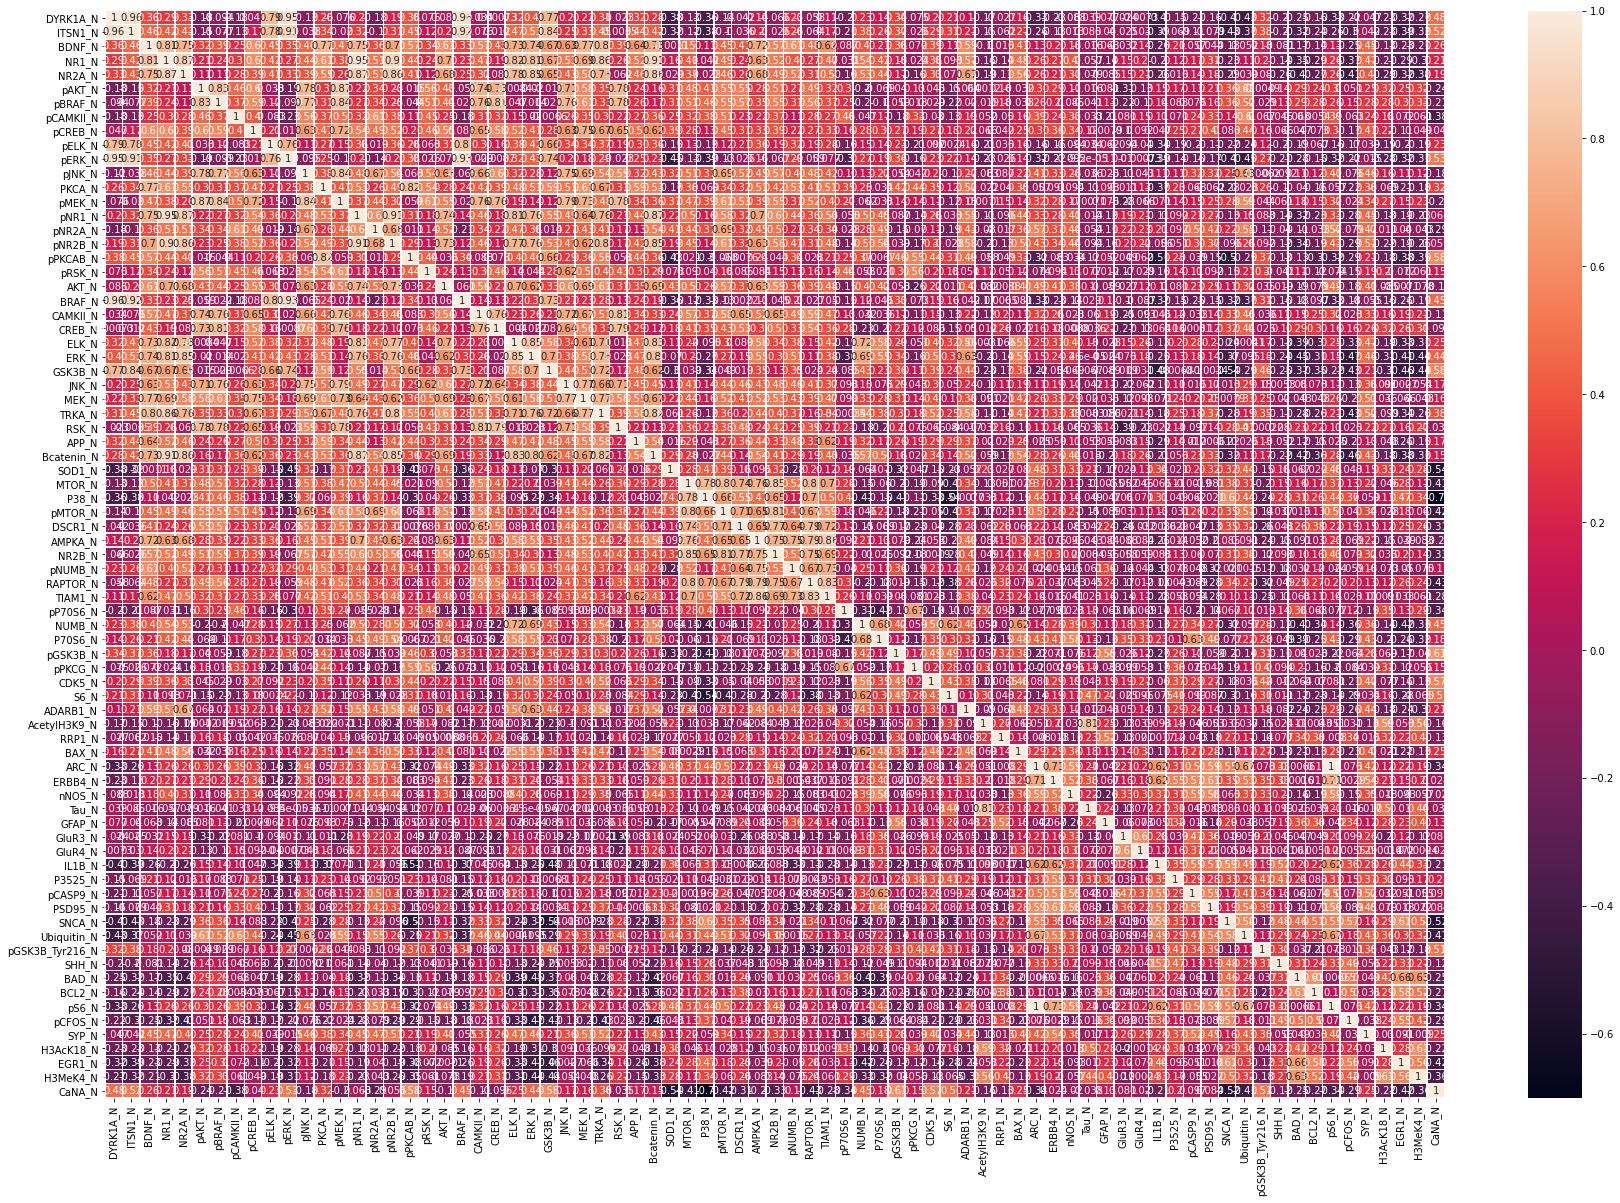

In [111]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidth=0.5)

##Data Preprocessing

In [112]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scale.fit(input_variable)
X=pd.DataFrame(scale.transform(input_variable))
y=pd.DataFrame(data_df['Genotype'])
#display(x)
print(X.shape)
print(y.shape)

(1077, 77)
(1077, 1)


In [113]:
#Data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


#Modeling

### Lasso regularized logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
logreg = LogisticRegression(penalty = 'l1',C =1.5,solver = 'liblinear')
logreg.fit(X_train,y_train)
y_pred_l1 = logreg.predict(X_test)
#Cross validation
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(logreg, X_train, y_train, cv=kfold)
print("\nThre cross validation score is:",results.mean())
# Printing the accuracy of the model
acc = accuracy_score(y_test,y_pred_l1)
print("The accuracy is:",acc,"\n")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),


Thre cross validation score is: 0.9751851851851852
The accuracy is: 0.9740740740740741 



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Elastic Net regularized logistic Regression

In [115]:
e_net = LogisticRegression(penalty='elasticnet',C=1.2,solver='saga',l1_ratio=0.5)
e_net.fit(X_train,y_train)
y_pred_enet = e_net.predict(X_test)
#Cross validation
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(e_net, X_train, y_train, cv=kfold)
print("\n \nScores:\n")
print("Thre cross validation score is:",result.mean())
# Printing the accuracy of the model
acc = accuracy_score(y_test,y_pred_enet)
print("The accuracy is:",acc,"\n \n")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa


 
Scores:

Thre cross validation score is: 0.9714899164174527
The accuracy is: 0.9703703703703703 
 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


###Random forest

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
hyperparameters = {'max_depth':[2,5,10,20],'n_estimators':[10,30,100]}
scoring='f1'
rfc=RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, hyperparameters, scoring=scoring)
clf_rfc.fit(np.array(X_train), np.squeeze(y_train))
print('Best parameters are :',clf_rfc.best_params_)
y_test_true=np.squeeze(y_test)
y_pred_rf=clf_rfc.best_estimator_.predict(X_test)

print('testing parameters for Random Forest Classification')
print('\nAccuracy score:',metrics.accuracy_score(y_test_true,y_pred_rf))
print('\n f1 score      :',metrics.f1_score(y_test_true,y_pred_rf))
print('\nroc_auc_score : ', metrics.roc_auc_score(y_test_true,y_pred_rf))
print('\n')
#Cross validation
kfold = KFold(n_splits=6, random_state=7)
result = cross_val_score(rfc, X_train, y_train, cv=kfold)
print("\n \n")
print("Thre cross validation score is:",result.mean())

Best parameters are : {'max_depth': 10, 'n_estimators': 100}
testing parameters for Random Forest Classification

Accuracy score: 0.9814814814814815

 f1 score      : 0.9781659388646288

roc_auc_score :  0.9786324786324787




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array


 

Thre cross validation score is: 0.9838861249309011


###Support vector

In [117]:
from sklearn.svm import SVC
hyperparameters = {'kernel':('rbf','linear','poly'), 'C':[.1, 1, 5, 10], 'degree':[3,5,8]}
svc=SVC()
clf_svc = GridSearchCV(svc, hyperparameters, scoring= 'f1')
clf_svc.fit(np.array(X_train), np.squeeze(y_train))
svc_final_model=clf_svc.best_estimator_
prediction=svc_final_model.predict(X_test) #fitting model to the best data 

print('best estimator parameters are :',clf_svc.best_params_)
print('testing parameters for SV Classification')
print('\nAccuracy score:',metrics.accuracy_score(y_test,prediction))
print('\nf1 score      :', metrics.f1_score(y_test, prediction))
print('\nroc_auc_score : ', metrics.roc_auc_score(y_test, prediction))
print('\n')


best estimator parameters are : {'C': 5, 'degree': 3, 'kernel': 'rbf'}
testing parameters for SV Classification

Accuracy score: 1.0

f1 score      : 1.0

roc_auc_score :  1.0




### recursive feature elimination

In [118]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfc = RandomForestClassifier(random_state=52)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
model=rfecv.fit(X_train, y_train)
Y_predicted=model.predict(X_test)

print('testing parameters for Recursive feature elimination with cross validation')
print('\nAccuracy score:',metrics.accuracy_score(y_test,Y_predicted))
print('\nf1 score      :',metrics.f1_score(y_test,Y_predicted))
print('\nroc_auc_score : ', metrics.roc_auc_score(y_test,Y_predicted))
print('\n')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


testing parameters for Recursive feature elimination with cross validation

Accuracy score: 0.9851851851851852

f1 score      : 0.9826086956521739

roc_auc_score :  0.982905982905983




#Conclusion

The **Support Vector** is the best choice among these models for the given dataset due to high accuracy of the model.